In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')
df
df.head(10)
#to avoid the warning of unicode escape, we can use encoding = 'unicode_escape' in read_csv function

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [17]:
df.shape

(11251, 15)

data cleaning process

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#drop the columns which are not required / blanks.
df.drop(['Status','unnamed1'],axis = 1, inplace = True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [26]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [29]:
df.dropna(inplace = True)

In [ ]:
print(pd.isnull(df).sum())
print("")
print(df.shape)    #the shape of the dataframe after dropping the null values before its was(11251, 15)

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

(11239, 13)


In [39]:
#change data types of the columns
df['Amount'] = df['Amount'].astype('int')

In [40]:
df['Amount'].dtype

dtype('int64')

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [42]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
#the value i want to see in describe functions.
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


EDA(EXPLORATORY DATA ANALYSIS).

GENDER

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

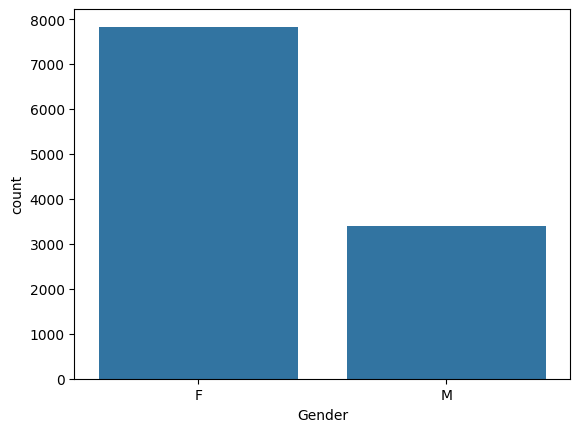

In [51]:
sns.countplot(x = 'Gender',data = df)

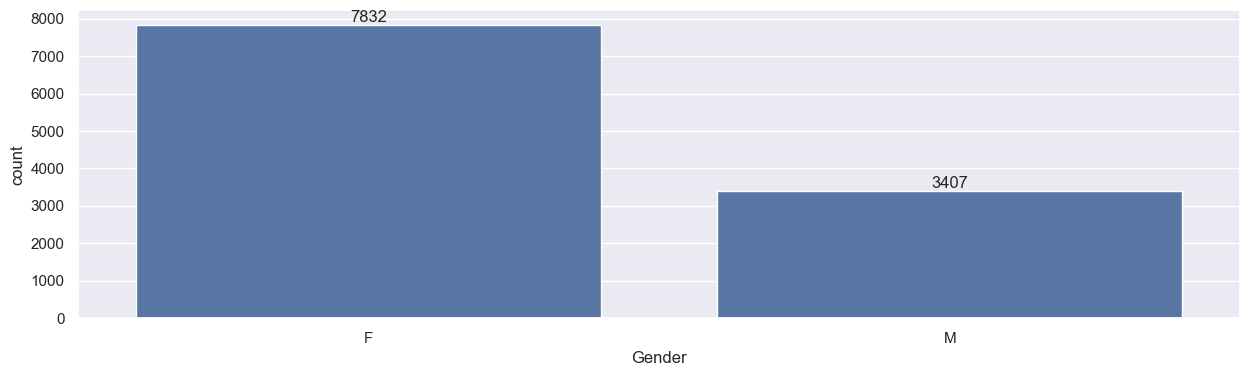

In [80]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [56]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

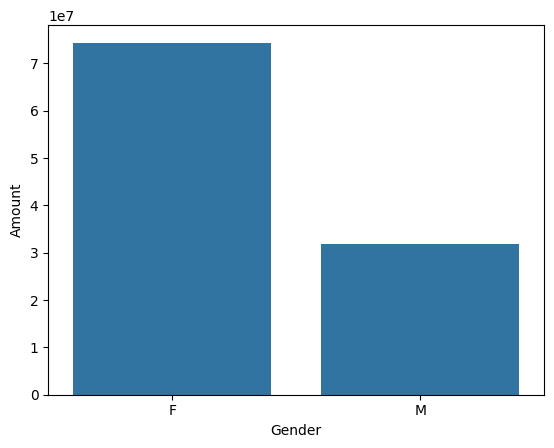

In [58]:
sales = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender',y = 'Amount',data = sales)

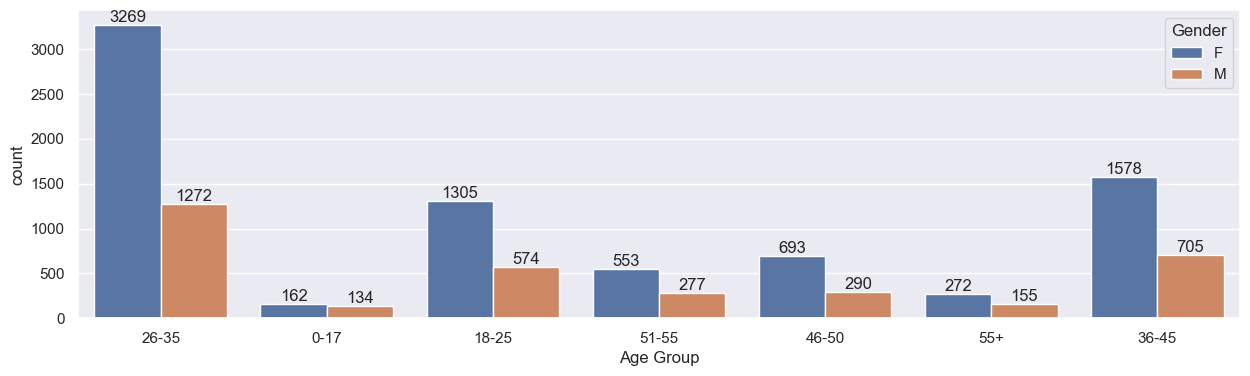

In [81]:
ax = sns.countplot(x = 'Age Group',data = df , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can see that most of the buyers are female and even the purchasing power of females are greater than men

AGE

<Axes: xlabel='Age Group', ylabel='count'>

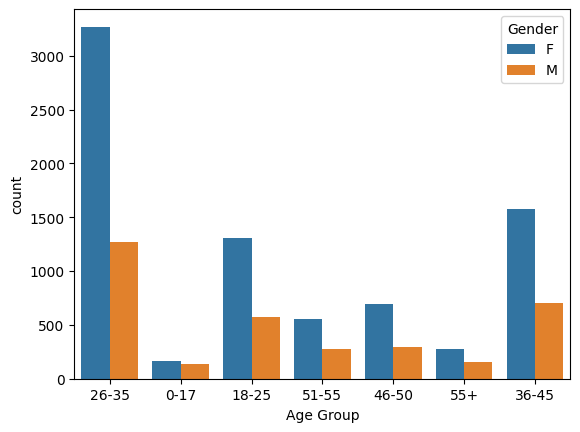

In [61]:
sns.countplot(x = 'Age Group',data = df, hue = 'Gender')

In [63]:
#total Amount vs Age Group.

df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

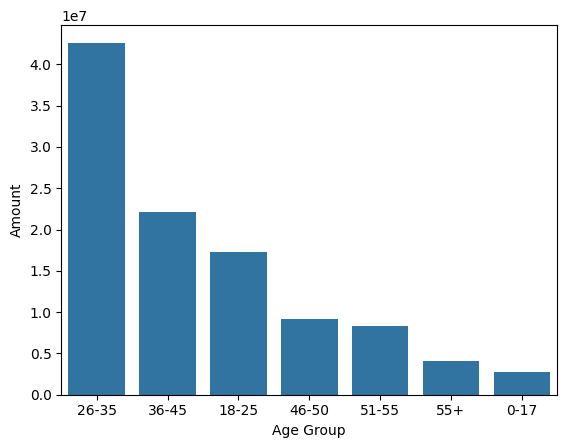

In [64]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group',y = 'Amount',data = sales_age)

From the above graph we can see that most of the buyers are of age group between 26-35 yrs female.

State

In [76]:
# total number of oders from top 10 states.
sales_orders = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sales_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

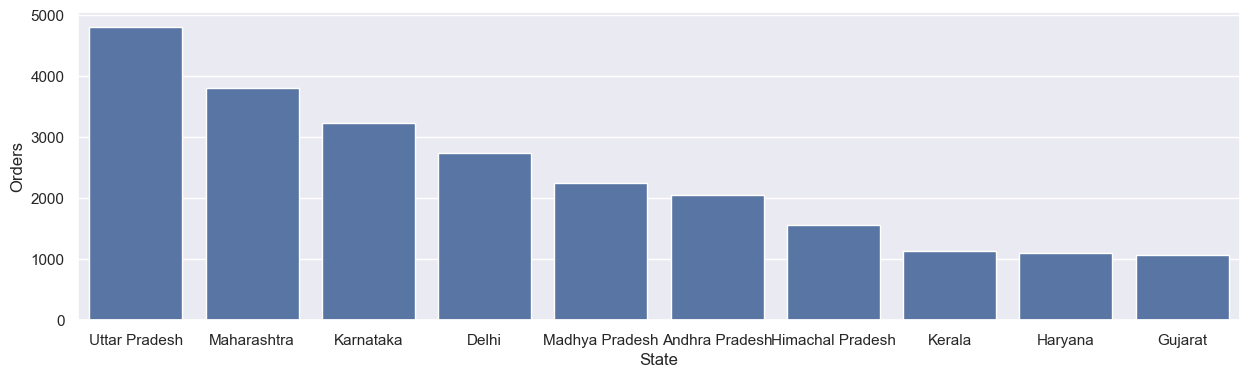

In [77]:
sns.set(rc = {'figure.figsize':(15,4)})
sns.barplot(data = sales_oders , x = 'State',y = 'Orders')

In [78]:
#total amount/sales from top 10 states.
sales_states = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sales_states

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

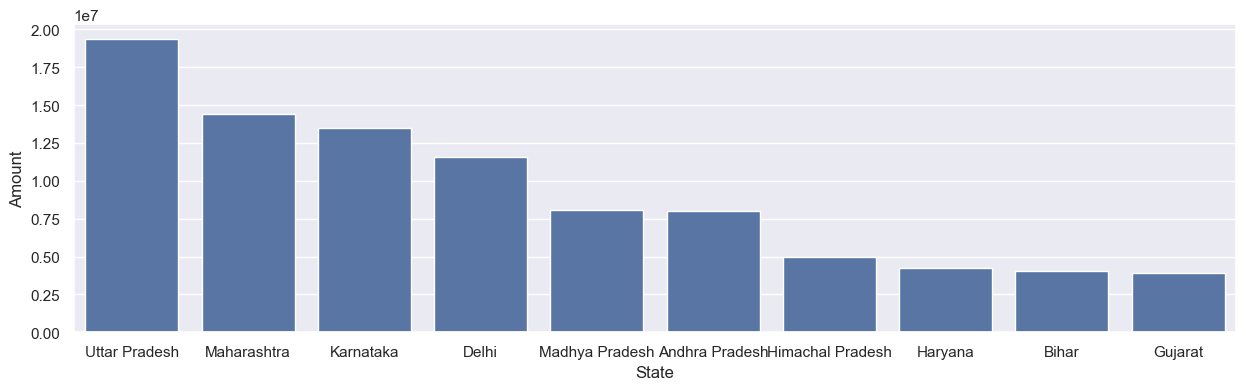

In [79]:
sns.set(rc = {'figure.figsize':(15,4)})
sns.barplot(data = sales_states , x = 'State',y = 'Amount')

from above graph we can see that most of the oders and total sales/amount are from utter pradesh,maharashtra, and karnataka respectivly

Martial Status

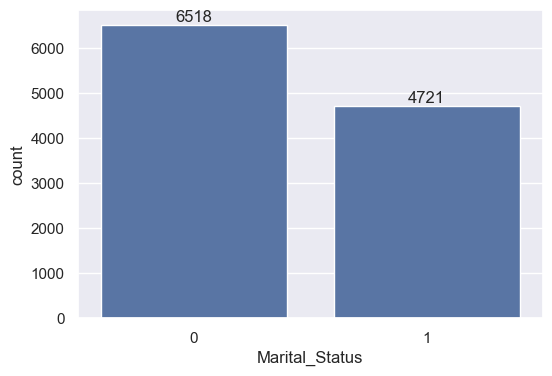

In [95]:
ax = sns.countplot(data = df , x = 'Marital_Status')


for bars in ax.containers:
    ax.bar_label(bars)

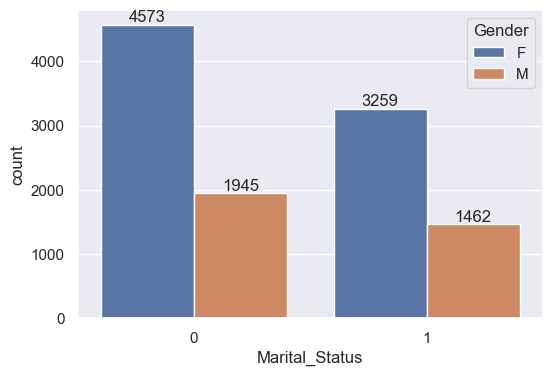

In [96]:
ax = sns.countplot(data = df , x = 'Marital_Status',hue = 'Gender')


for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
amount_sales = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
amount_sales

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

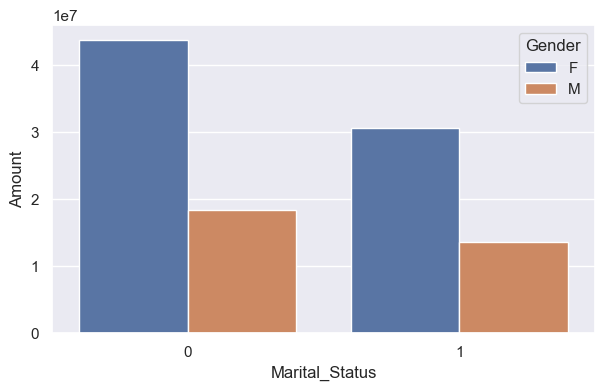

In [106]:
sns.set(rc = {'figure.figsize':(7,4)})
sns.barplot(data = amount_sales , x = 'Marital_Status',y = 'Amount',hue = 'Gender')

From the above graph we can see that most of the buyers are married(women) and they have high purchasing power.

OCCUPATION

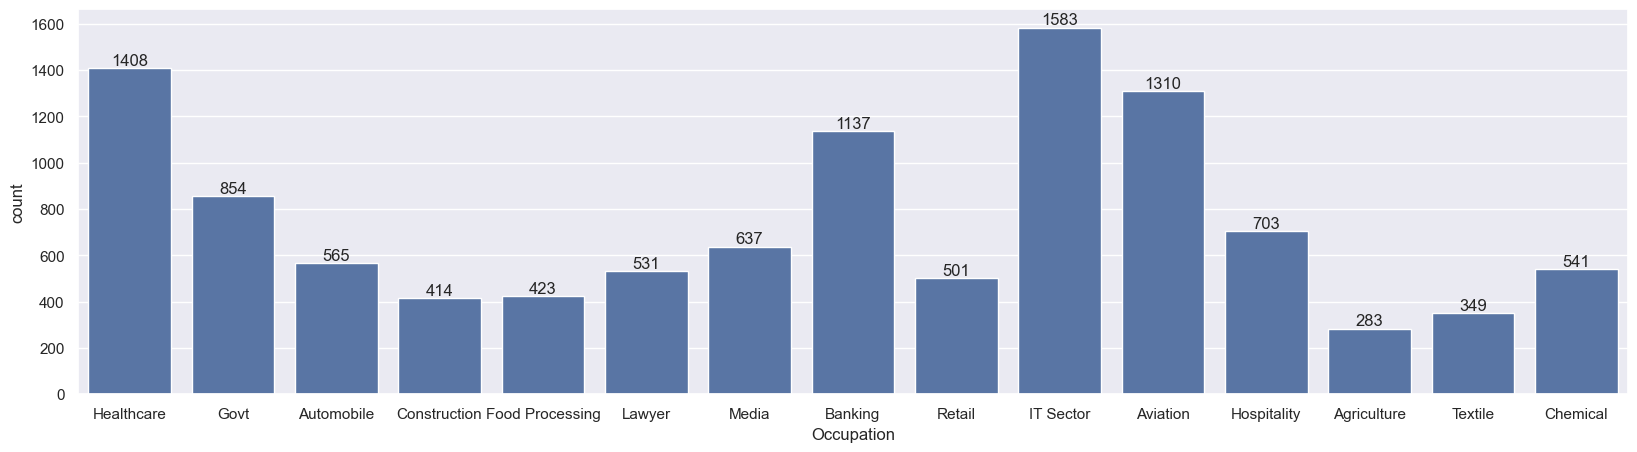

In [111]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df , x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [112]:
occupation_sales = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
occupation_sales

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

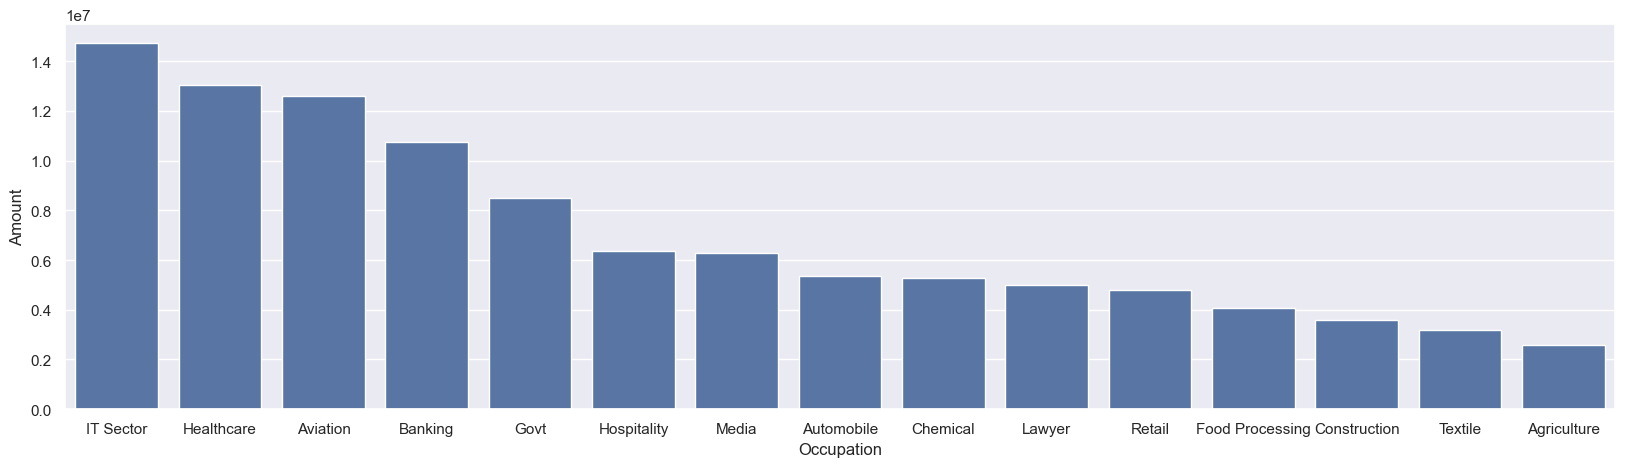

In [113]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = occupation_sales , x = 'Occupation',y = 'Amount')

From above graph we can see that most of the buyers are working in IT,Healthcare and Avation and sectors.

PRODUCTS CATEGORY

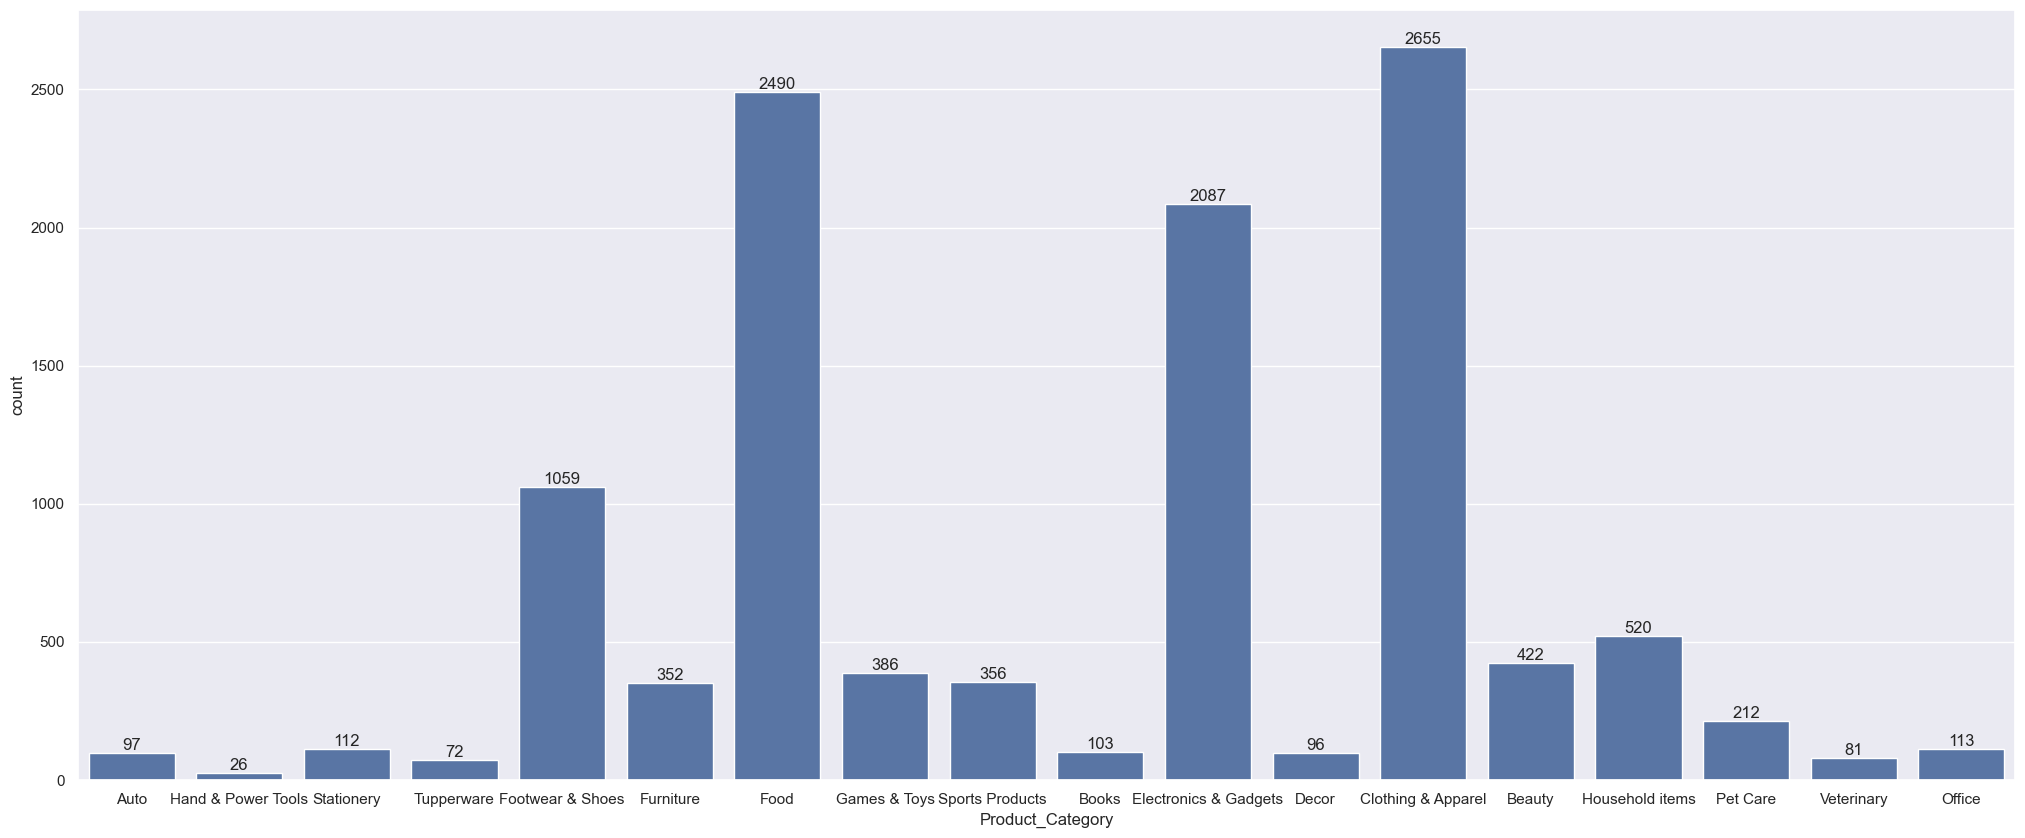

In [130]:
sns.set(rc = {'figure.figsize':(25,10)})
ax = sns.countplot(data = df , x ='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
products_sales = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(5)
products_sales

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


<Axes: xlabel='Product_Category', ylabel='Amount'>

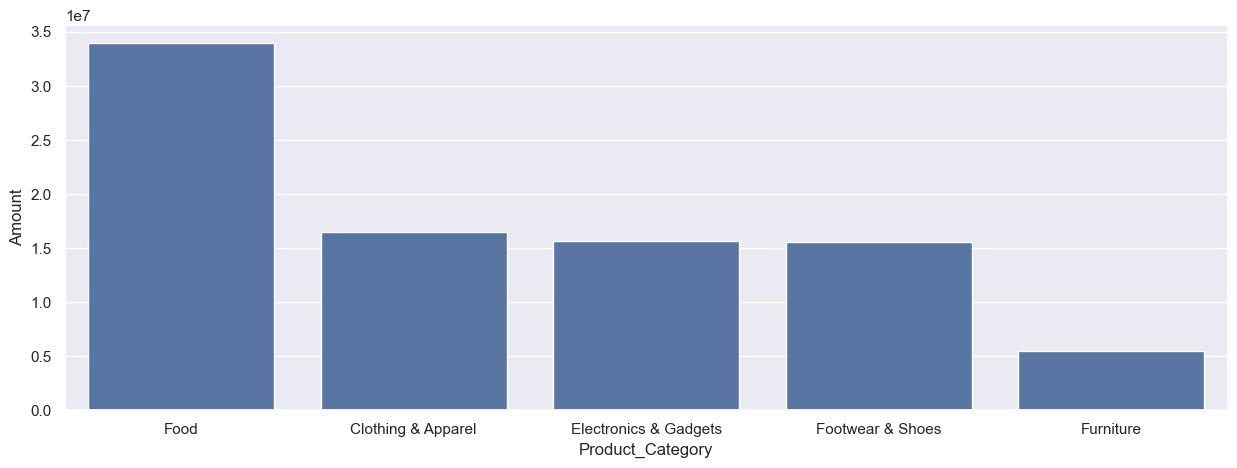

In [128]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = products_sales , x = 'Product_Category',y = 'Amount')

From the above graph we can see that most of the sold products are FOOD,CLOTHERS, and ELECTRONIC & CATEGORY.

CONCLUSION:

Married women age group 26-35 yrs from UP,Maharastra and Karnataka working in IT,Healthcare and aviation are more likely to buy products from food clothing and electronic category.